# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
total_weather_data = []


for x in range(len(cities)):
    
    response_weather = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={cities[x]}&appid={weather_api_key}&units=metric').json()
    
    if response_weather['cod'] == '404':
        
        print (f'Processing Record {x} | Failed to retrieve {cities[x]}')
    
    else:
    
        print(f"Processing Record {x} | Retrieving {cities[x]}")
    
        total_weather_data.append({'Latitude':response_weather['coord']['lat'],'Longitude':response_weather['coord']['lon'],'City':response_weather['name'],'Country':response_weather['sys']['country'],'Time':response_weather['dt'],
                                   'Temp (Celsius)':response_weather['main']['temp'],'Max Temp (Celsius)':response_weather['main']['temp_max'],'Cloudiness %':response_weather['clouds']['all'],
                                  'Wind Speed (m/s)':response_weather['wind']['speed'],'Humidity %':response_weather['main']['humidity']})
    
    

Processing Record 0 | Retrieving hobart
Processing Record 1 | Retrieving san patricio
Processing Record 2 | Failed to retrieve taolanaro
Processing Record 3 | Retrieving kruisfontein
Processing Record 4 | Retrieving bredasdorp
Processing Record 5 | Retrieving mar del plata
Processing Record 6 | Retrieving friedland
Processing Record 7 | Retrieving kampot
Processing Record 8 | Retrieving punta arenas
Processing Record 9 | Retrieving tiksi
Processing Record 10 | Retrieving castro
Processing Record 11 | Retrieving saint-philippe
Processing Record 12 | Retrieving lorengau
Processing Record 13 | Retrieving kapaa
Processing Record 14 | Retrieving alyangula
Processing Record 15 | Retrieving tshikapa
Processing Record 16 | Retrieving katsuura
Processing Record 17 | Retrieving ushuaia
Processing Record 18 | Retrieving bermeo
Processing Record 19 | Retrieving adrar
Processing Record 20 | Retrieving nouadhibou
Processing Record 21 | Failed to retrieve grand river south east
Processing Record 22 |

Processing Record 186 | Retrieving fukue
Processing Record 187 | Retrieving makat
Processing Record 188 | Retrieving dingle
Processing Record 189 | Retrieving lethem
Processing Record 190 | Retrieving parthenay
Processing Record 191 | Retrieving vilyuysk
Processing Record 192 | Failed to retrieve illoqqortoormiut
Processing Record 193 | Failed to retrieve choucheng
Processing Record 194 | Retrieving kavieng
Processing Record 195 | Retrieving ravar
Processing Record 196 | Retrieving iquitos
Processing Record 197 | Retrieving victoria
Processing Record 198 | Retrieving hualmay
Processing Record 199 | Retrieving pangoa
Processing Record 200 | Retrieving omboue
Processing Record 201 | Retrieving grand gaube
Processing Record 202 | Retrieving akureyri
Processing Record 203 | Retrieving loandjili
Processing Record 204 | Retrieving bandarbeyla
Processing Record 205 | Retrieving warrington
Processing Record 206 | Retrieving itaqui
Processing Record 207 | Retrieving kenora
Processing Record 208

Processing Record 370 | Retrieving simdega
Processing Record 371 | Retrieving mount isa
Processing Record 372 | Failed to retrieve shkotovo-26
Processing Record 373 | Retrieving paita
Processing Record 374 | Retrieving cabedelo
Processing Record 375 | Retrieving matara
Processing Record 376 | Retrieving walvis bay
Processing Record 377 | Failed to retrieve saryshagan
Processing Record 378 | Retrieving bosaso
Processing Record 379 | Retrieving cherskiy
Processing Record 380 | Retrieving belaguntha
Processing Record 381 | Retrieving hovd
Processing Record 382 | Failed to retrieve tumannyy
Processing Record 383 | Retrieving provideniya
Processing Record 384 | Retrieving khatanga
Processing Record 385 | Failed to retrieve bolungarvik
Processing Record 386 | Retrieving dangriga
Processing Record 387 | Retrieving tinqueux
Processing Record 388 | Retrieving boralday
Processing Record 389 | Retrieving westport
Processing Record 390 | Retrieving cabinda
Processing Record 391 | Retrieving pajapa

Processing Record 555 | Retrieving bereda
Processing Record 556 | Retrieving nabire
Processing Record 557 | Retrieving mandurah
Processing Record 558 | Retrieving san ignacio
Processing Record 559 | Retrieving geraldton
Processing Record 560 | Retrieving ketchikan
Processing Record 561 | Retrieving ojuelos de jalisco
Processing Record 562 | Retrieving fortuna
Processing Record 563 | Retrieving rudraprayag
Processing Record 564 | Retrieving nador
Processing Record 565 | Retrieving huarmey
Processing Record 566 | Retrieving urupes
Processing Record 567 | Retrieving fort smith
Processing Record 568 | Retrieving sangar
Processing Record 569 | Retrieving sambava
Processing Record 570 | Retrieving potsdam
Processing Record 571 | Retrieving eureka
Processing Record 572 | Retrieving camapua
Processing Record 573 | Retrieving chaykovskiy
Processing Record 574 | Retrieving araquari
Processing Record 575 | Retrieving aktas
Processing Record 576 | Retrieving skjervoy
Processing Record 577 | Retrie

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather_sample_df = pd.DataFrame(total_weather_data)
city_weather_sample_df.to_csv('city_weather_sample.csv')
city_weather_sample_df

,Latitude,Longitude,City,Country,Time,Temp (Celsius),Max Temp (Celsius),Cloudiness %,Wind Speed (m/s),Humidity %
0,-42.88,147.33,Hobart,AU,1583862019,9.20,11.00,0,4.10,87
1,19.22,-104.70,San Patricio,MX,1583862202,29.00,29.00,20,3.10,70
2,-34.00,24.73,Kruisfontein,ZA,1583862202,18.64,18.64,100,6.56,92
3,-34.53,20.04,Bredasdorp,ZA,1583862202,20.82,21.00,67,6.20,56
4,-38.00,-57.56,Mar del Plata,AR,1583862202,19.47,20.00,40,6.20,68
...,...,...,...,...,...,...,...,...,...,...
566,-22.43,-151.33,Moerai,PF,1583862264,26.92,26.92,100,1.44,69
567,71.04,27.85,Mehamn,NO,1583862264,-5.00,-5.00,75,9.30,57
568,29.03,21.55,Jalu,LY,1583862038,17.95,17.95,0,5.03,29
569,50.68,47.45,Piterka,RU,1583862264,7.60,7.60,98,5.57,46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

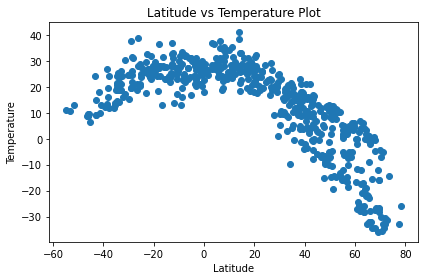

In [43]:
x_axis = city_weather_sample_df['Latitude']
Temperatures = city_weather_sample_df['Temp (Celsius)']
plt.scatter(x_axis,Temperatures)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs Temperature Plot')
plt.tight_layout()
plt.savefig('Images/Latitude vs Temperature Plot.png')

#### Latitude vs. Humidity Plot

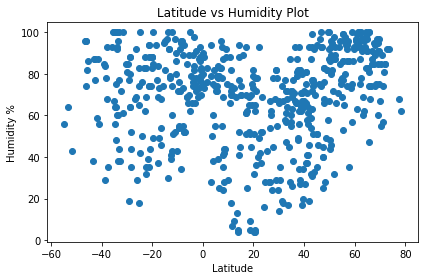

In [44]:
Humidities = city_weather_sample_df['Humidity %']
plt.scatter(x_axis,Humidities)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs Humidity Plot')
plt.tight_layout()
plt.savefig('Images/Latitude vs Humidity Plot.png')

#### Latitude vs. Cloudiness Plot

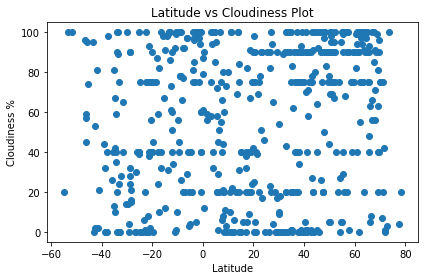

In [45]:
Cloudiness = city_weather_sample_df['Cloudiness %']
plt.scatter(x_axis,Cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs Cloudiness Plot')
plt.tight_layout()
plt.savefig('Images/Latitude vs Cloudiness Plot.png')

#### Latitude vs. Wind Speed Plot

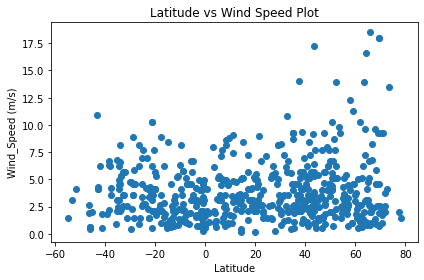

In [46]:
Wind_Speeds = city_weather_sample_df['Wind Speed (m/s)']
plt.scatter(x_axis,Wind_Speeds)
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (m/s)')
plt.title('Latitude vs Wind Speed Plot')
plt.tight_layout()
plt.savefig('Images/Latitude vs Wind Speed Plot.png')

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regress(x,y):
    y_axis = y
    x_axis = x
    
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    regress_values = x*slope + intercept
    
    plt.scatter(x,y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.plot(x,regress_values,'r')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    if x.min() < 0:
        plt.annotate(line_eq,(x.min()/2,y.max()/2),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(x.max()/2,y.max()/2),fontsize=15,color="red")

In [65]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere_Data = city_weather_sample_df.loc[city_weather_sample_df['Latitude'] > 0,:]
Southern_Hemisphere_Data = city_weather_sample_df.loc[city_weather_sample_df['Latitude'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

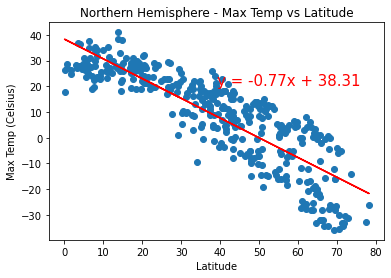

In [66]:
linear_regress(Northern_Hemisphere_Data['Latitude'],Northern_Hemisphere_Data['Max Temp (Celsius)'])

plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.savefig('Images/Northern Hemisphere - Max Temp vs Latitude.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

These Two graphs of Max Temp Vs Latitude show that the closer you are to the equator, generally the higher the max temperatures are. The Inverse is true as you move away from the equator.


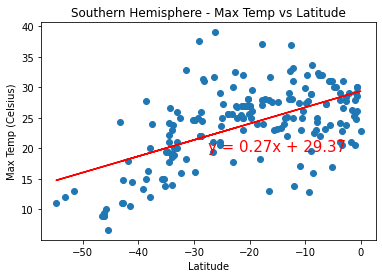

In [67]:
linear_regress(Southern_Hemisphere_Data['Latitude'],Southern_Hemisphere_Data['Max Temp (Celsius)'])

plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.savefig('Images/Southern Hemisphere - Max Temp vs Latitude.png')

print('These Two graphs of Max Temp Vs Latitude show that the closer you are to the equator, generally the higher the max temperatures are. The Inverse is true as you move away from the equator.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

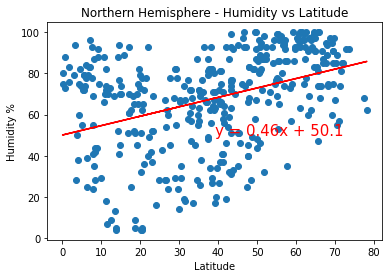

In [68]:
linear_regress(Northern_Hemisphere_Data['Latitude'],Northern_Hemisphere_Data['Humidity %'])

plt.title('Northern Hemisphere - Humidity vs Latitude')
plt.savefig('Images/Northern Hemisphere - Humidity vs Latitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

These two graphs of Humidity % vs Latitude as a whole do not show a discernable trend in terms of distance from the equator and Humidity %. However, for the Northern Hemisphere, there is a general trend that shows that Humidity increases as you move away from the equator.


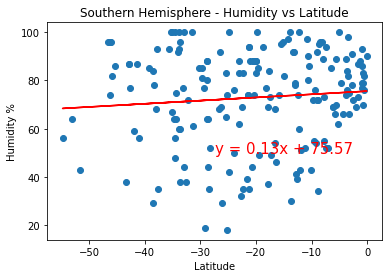

In [74]:
linear_regress(Southern_Hemisphere_Data['Latitude'],Southern_Hemisphere_Data['Humidity %'])

plt.title('Southern Hemisphere - Humidity vs Latitude')
plt.savefig('Images/Southern Hemisphere - Humidity vs Latitude.png')

print('These two graphs of Humidity % vs Latitude as a whole do not show a discernable trend in terms of distance from the equator and Humidity %. However, for the Northern Hemisphere, there is a general trend that shows that Humidity % increases as you move away from the equator.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

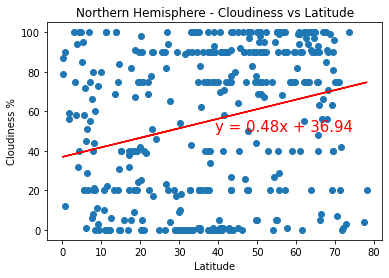

In [70]:
linear_regress(Northern_Hemisphere_Data['Latitude'],Northern_Hemisphere_Data['Cloudiness %'])

plt.title('Northern Hemisphere - Cloudiness vs Latitude')
plt.savefig('Images/Northern Hemisphere - Cloudiness vs Latitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

These two graphs of Cloudiness % vs Latitude show a general trend for each hemisphere. In the Northern Hemishere, as you move away from the equator, the cloudiness % increases. The opposite is true in the southern hemisphere, which shows a general trend of cloudiness % decreasing as you move away from the equator.


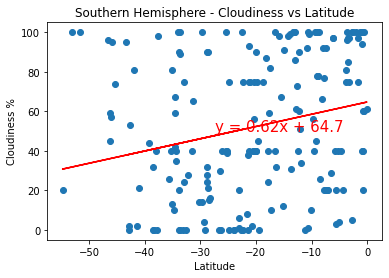

In [75]:
linear_regress(Southern_Hemisphere_Data['Latitude'],Southern_Hemisphere_Data['Cloudiness %'])

plt.title('Southern Hemisphere - Cloudiness vs Latitude')
plt.savefig('Images/Southern Hemisphere - Cloudiness vs Latitude.png')

print(f'These two graphs of Cloudiness % vs Latitude show a general trend for each hemisphere. In the Northern Hemishere, as you move away from the equator, the cloudiness % increases. The opposite is true in the southern hemisphere, which shows a general trend of cloudiness % decreasing as you move away from the equator.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

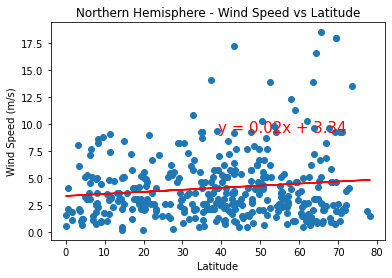

In [72]:
linear_regress(Northern_Hemisphere_Data['Latitude'],Northern_Hemisphere_Data['Wind Speed (m/s)'])

plt.title('Northern Hemisphere - Wind Speed vs Latitude')
plt.savefig('Images/Northern Hemisphere - Wind Speed vs Latitude.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

These two graphs of Wind Speed vs Latitude both show a general trend of wind speed increasing as you move away from the equator.


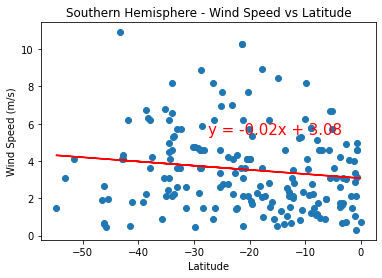

In [76]:
linear_regress(Southern_Hemisphere_Data['Latitude'],Southern_Hemisphere_Data['Wind Speed (m/s)'])

plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.savefig('Images/Southern Hemisphere - Wind Speed vs Latitude.png')

print('These two graphs of Wind Speed vs Latitude both show a general trend of wind speed increasing as you move away from the equator.')